# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP SEPTEMBER-2023

## AUTHOR - ARUN S K

### BEGINNER LEVEL TASK

### TASK-2 - Stock Market Prediction And Forecasting Using Stacked LSTM

#### DatasetLink  : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error


In [2]:
Dataset_link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
data= pd.read_csv(Dataset_link, parse_dates=True,)
data.reset_index()
data.head(15)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
data.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
data.shape

(2035, 8)

In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

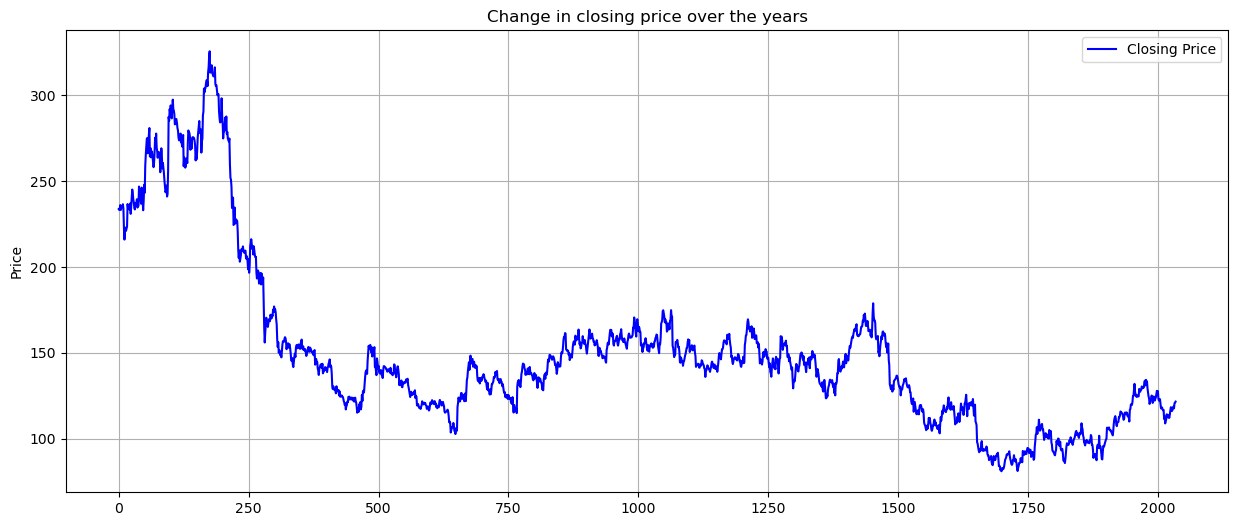

In [9]:
plt.figure(figsize=(10,6))
data['Close'].plot(kind='line',figsize=(15,6),color='b',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

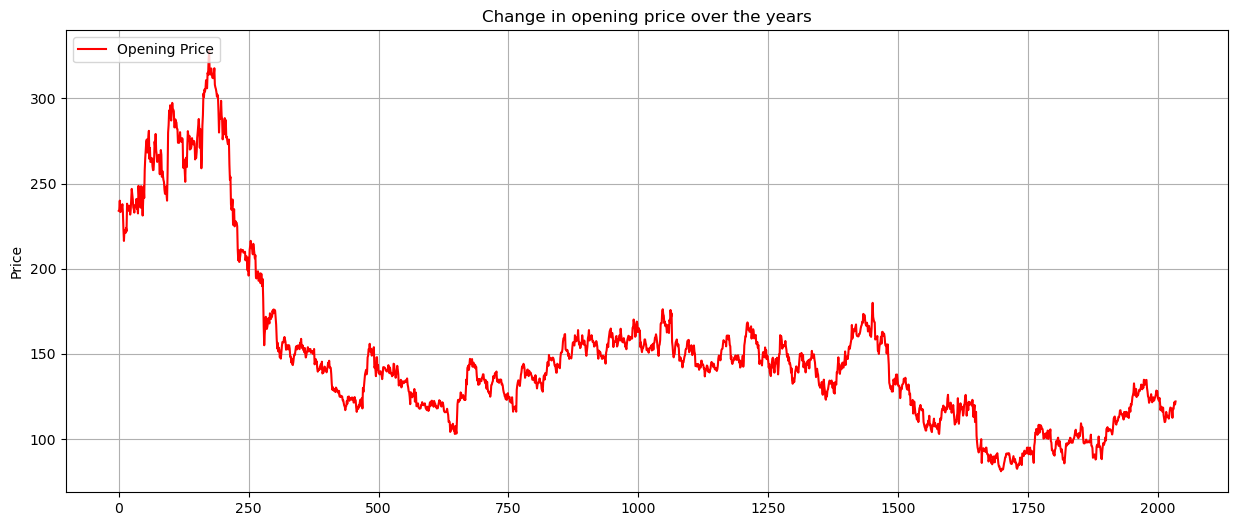

In [11]:
plt.figure(figsize=(10,6))
data['Open'].plot(kind='line',figsize=(15,6),color='r',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

In [12]:
df1=data.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

C:\Users\student\AppData\Local\Temp\ipykernel_14108\203004945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

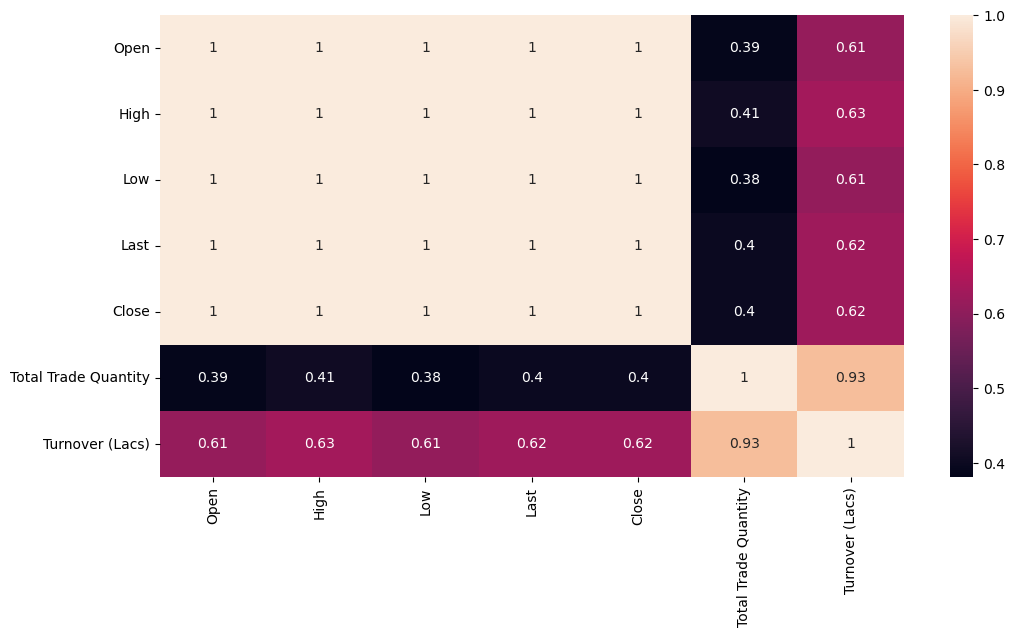

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<Axes: ylabel='Turnover (Lacs)'>

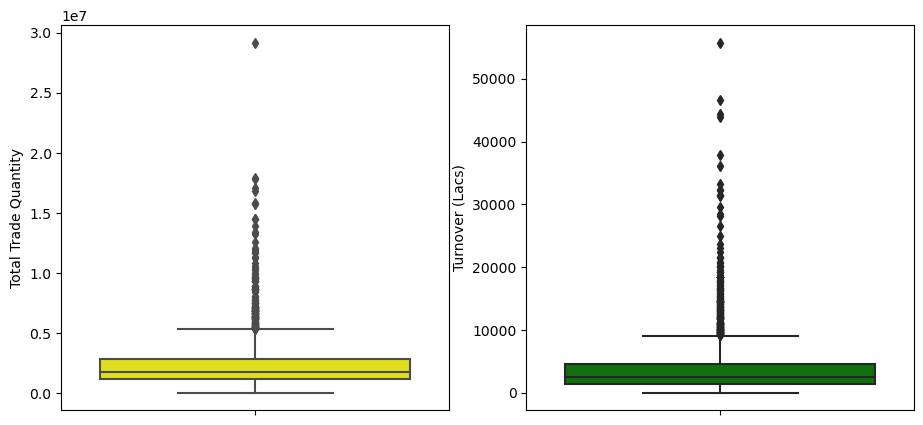

In [18]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=data,y='Total Trade Quantity',color='yellow')
plt.subplot(1,2,2)
sns.boxplot(data=data,y='Turnover (Lacs)',color='green')

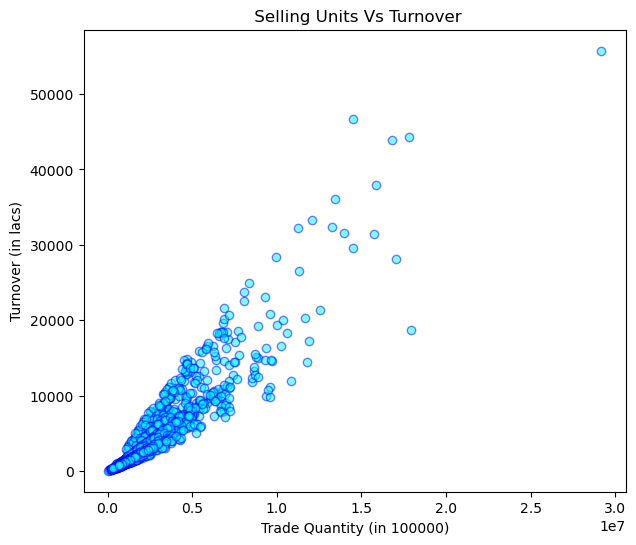

In [20]:
fig=plt.figure(figsize=(7,6))
plt.scatter(data['Total Trade Quantity'],data['Turnover (Lacs)'], alpha=0.5, edgecolor='b', color='cyan')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()


In [21]:
training_set= data[['Open']]
training_set=pd.DataFrame(training_set)
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
training_set_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [25]:
train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(data),:1] 

In [26]:
train_size1

1322

In [27]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)

In [29]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)


In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 80, batch_size = 64, verbose = 1)


Epoch 1/80
20/20 [==============================] - 7s 146ms/step - loss: 0.0223 - acc: 0.0000e+00 - val_loss: 0.0065 - val_acc: 0.0016
Epoch 2/80
20/20 [==============================] - 2s 100ms/step - loss: 0.0033 - acc: 8.1900e-04 - val_loss: 0.0012 - val_acc: 0.0016
Epoch 3/80
20/20 [==============================] - 2s 102ms/step - loss: 0.0019 - acc: 8.1900e-04 - val_loss: 8.8894e-04 - val_acc: 0.0016
Epoch 4/80
20/20 [==============================] - 2s 104ms/step - loss: 0.0016 - acc: 8.1900e-04 - val_loss: 0.0012 - val_acc: 0.0016
Epoch 5/80
20/20 [==============================] - 2s 101ms/step - loss: 0.0016 - acc: 8.1900e-04 - val_loss: 0.0011 - val_acc: 0.0016
Epoch 6/80
20/20 [==============================] - 2s 109ms/step - loss: 0.0014 - acc: 8.1900e-04 - val_loss: 9.1919e-04 - val_acc: 0.0016
Epoch 7/80
20/20 [==============================] - 2s 120ms/step - loss: 0.0013 - acc: 8.1900e-04 - val_loss: 0.0012 - val_acc: 0.0016
Epoch 8/80
20/20 [======================

In [33]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)
#Transformback to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

20/20 [==============================] - 0s 18ms/step


In [34]:
math.sqrt(mean_squared_error(y_train,train_predict1))

167.78537420060792

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict1))

117.18755246953953

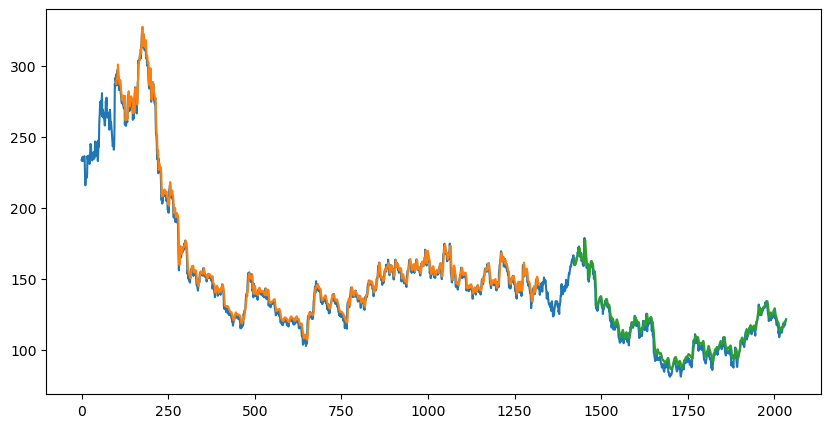

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()